In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.table import Table
import astropy.units as u

from stuff import Barnes2003_C, Barnes2003_I, BarnesPdot, OmC, bv2teff

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})


# Simple feasiblity study
Let's use the old Barnes'03 isochrone set to explore the exponential evolution of stars in period space

Text(0.5, 1.0, 'Barnes (2003)')

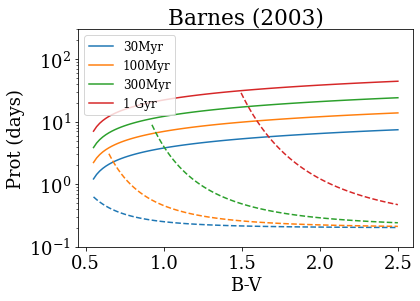

In [3]:
BV = np.linspace(0.55,2.5,100)

plt.plot(BV, Barnes2003_I(BV, 30), label='30Myr')
plt.plot(BV, Barnes2003_I(BV, 100), label='100Myr')
plt.plot(BV, Barnes2003_I(BV, 300), label='300Myr')
plt.plot(BV, Barnes2003_I(BV, 1000), label='1 Gyr')

plt.plot(BV, Barnes2003_C(BV, 30) ,ls='--', c='C0')
plt.plot(BV, Barnes2003_C(BV, 100),ls='--', c='C1')
plt.plot(BV, Barnes2003_C(BV, 300),ls='--', c='C2')
plt.plot(BV, Barnes2003_C(BV, 1000),ls='--', c='C3')
plt.legend(fontsize=12)


plt.yscale('log')
plt.ylim(1e-1,3e2)
plt.xlabel('B-V')
plt.ylabel('Prot (days)')
plt.title('Barnes (2003)')

3749.1497497635087


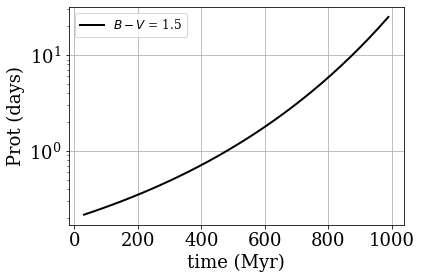

In [4]:
time = np.linspace(30,2999,100) # in Myr
BV = 1.5
print(bv2teff(BV))
plt.plot(time, Barnes2003_C(BV, time), label='$B-V$ = 1.5', c='k', lw=2)
plt.yscale('log')
plt.xlabel('time (Myr)')
plt.ylabel('Prot (days)')
plt.legend(fontsize=12)
plt.grid(True)

In [5]:
dpdt = (10 - 1) / (400 * 356.25 * 1e6)
np.log10(dpdt) # this was my rough guess on paper

-10.199572354905204

# How big is the Pdot signal?

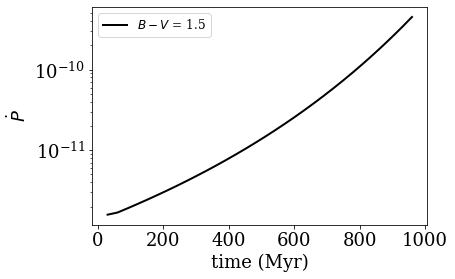

In [6]:
time = np.linspace(30,2999,100) # in Myr
BV = 1.5

plt.plot(time, BarnesPdot(BV, time), label='$B-V$ = 1.5', c='k', lw=2)
plt.yscale('log')
plt.xlabel('time (Myr)')
plt.ylabel('$\dot{P}$')
plt.legend(fontsize=12)

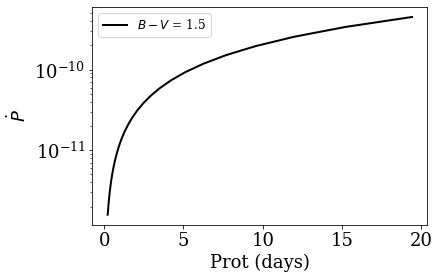

In [7]:
BV = 1.5
plt.plot(Barnes2003_C(BV,time), BarnesPdot(BV, time), label='$B-V$ = 1.5', c='k', lw=2)
# plt.xscale('log')
plt.yscale('log')
plt.xlabel('Prot (days)')
plt.ylabel('$\dot{P}$')
plt.legend(fontsize=12)

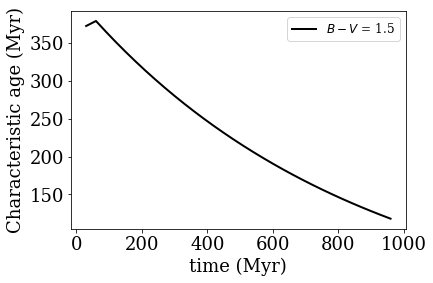

In [8]:
# characteristic age:
# https://astronomy.swin.edu.au/cosmos/p/pulsar+characteristic+age
BV = 1.5
plt.plot(time, Barnes2003_C(BV,time)/365.25/1e6/BarnesPdot(BV, time), label='$B-V$ = 1.5', c='k', lw=2)
# plt.yscale('log')
plt.xlabel('time (Myr)')
plt.ylabel('Characteristic age (Myr)')
plt.legend(fontsize=12)


/Users/james/Dropbox/research_projects/rapid-spin-down/code/stuff.py:22: RuntimeWarning: overflow encountered in exp
  P = 0.2 * np.exp(t / (100* (BV + 0.1 - (t/3000))**3))


Text(0.5, 0, 'time (Myr)')

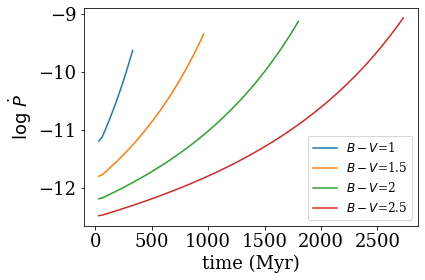

In [9]:
time = np.linspace(30,2999,100)

plt.figure()
plt.plot(time, np.log10(BarnesPdot(1, time)), label='$B-V$=1' )
plt.plot(time, np.log10(BarnesPdot(1.5, time)), label='$B-V$=1.5' )
plt.plot(time, np.log10(BarnesPdot(2, time)), label='$B-V$=2' )
plt.plot(time, np.log10(BarnesPdot(2.5, time)), label='$B-V$=2.5' )
plt.legend(fontsize=12)
plt.ylabel('$\log$ $\dot{P}$')
plt.xlabel('time (Myr)')

# How big is the O-C signal?
Let's use 10-year as our observing baseline

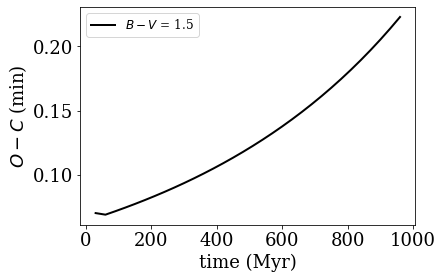

In [10]:
time = np.linspace(30,2999,100)
    
BV=1.5
plt.plot(time, OmC(BV, time), label='$B-V$ = 1.5', c='k', lw=2)
# plt.yscale('log')
plt.xlabel('time (Myr)')
plt.ylabel('$O-C$ (min)')
plt.legend(fontsize=12)

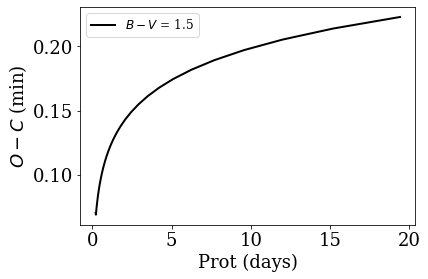

In [11]:
BV=1.5
plt.plot(Barnes2003_C(BV,time), OmC(BV, time), label='$B-V$ = 1.5', c='k', lw=2)
# plt.xscale('log')
plt.xlabel('Prot (days)')
plt.ylabel('$O-C$ (min)')
plt.legend(fontsize=12)

/Users/james/Dropbox/research_projects/rapid-spin-down/code/stuff.py:22: RuntimeWarning: overflow encountered in exp
  P = 0.2 * np.exp(t / (100* (BV + 0.1 - (t/3000))**3))


Text(0.5, 0, 'time (Myr)')

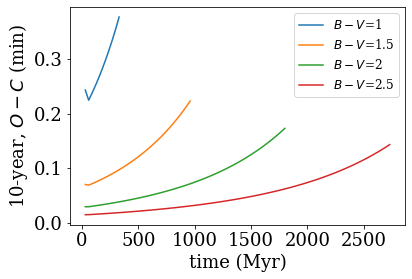

In [12]:
f=1 # no extra pdot fudgefactor yet
plt.figure()
plt.plot(time, OmC(1, time,f=f), label='$B-V$=1' )
plt.plot(time, OmC(1.5, time,f=f), label='$B-V$=1.5' )
plt.plot(time, OmC(2, time,f=f), label='$B-V$=2' )
plt.plot(time, OmC(2.5, time,f=f), label='$B-V$=2.5' )
plt.legend(fontsize=12)
plt.ylabel('10-year, $O-C$ (min)')
plt.xlabel('time (Myr)')

# takeaway
*as of 2021-Aug-9*

the feasibility guess is about 10x lower than I expected for the O-C signal.

Trying to time starspot rotation to minutes precision and accuracy over 10years seems doable, but < 1min seems really hard to claim a signal is real for any star vs starspot evolution.

So we're not dead in the water, but so far we're relying on ensemble statistics

**next notebook:** proof of concept for the actual O-C measurment w/ Kepler data! (+ TESS if possible)